# EvolvePy Example 1 - Simple EA

In this example, you will be introduced to the main components of the EvolvePy package.

- Defining a fitness function
- Using evaluators
- Using generators
- Evolving a population

In [1]:
try:
    import evolvepy
except:
    import sys
    sys.path.append("..\src")
import evolvepy

import numpy as np
from matplotlib import pyplot as plt

## Generator

The first main component, generator, allow the generation of populations according to the evaluations of individuals, using evolutionary operators such as crossover and mutation.

Let's define a simple generator with tournament selection, one point crossover and mutation. We use layers to represent each operator that will be executed on the population, sequentially.

In [2]:
from evolvepy.generator import Generator, CombineLayer
from evolvepy.generator.mutation import NumericMutationLayer, sum_mutation
from evolvepy.generator.crossover import one_point
from evolvepy.generator.selection import tournament

# Defines the layers of the generator
layers = [CombineLayer(tournament, one_point), NumericMutationLayer(sum_mutation, 1.0, 0.0, (-10.0, 10.0))]

# Creates the generator, specifying that an individual has only one chromosome, which can vary between -1000 and 4000 
generator = Generator(1, layers, (-1000.0, 4000.0))

Let's generate some example individuals

In [3]:
generator.generate(3)

array([([3384.4307],), ([1528.9824],), ([3522.8984],)],
      dtype=[('chr0', '<f4', (1,))])

Notice how the array type is some strange `[('chr0', '<f4', (1,))]` type. It is because EvolvePy uses NumPy structured arrays to represent individuals, allowing individuals to have different chromosomes of different sizes and types. We'll explore this in later examples, where we'll define different operators for each chromosome.

`[('chr0', '<f4', (1,))]` means that an individual has an entry, called "chr0" (as if it were an element of a structure in C/C++), of type "<f4", which represents float32, and each chromosome has only one gene.

## Fitness function and evaluators

The fitness function is the function that will assess whether our population is evolving in the direction we want. We will use here a simple unidimensional function to examplify.

In [4]:
def fitness_function(individuals):
    # Gets the first gene of chromossome "chr0" (default name), in the first and only individual
    individual = individuals[0]["chr0"][0] 

    score = 0

    if individual < 500:
        score = individual
    elif individual < 1000:
        score = 1000 - individual
    elif individual < 2000:
        score = individual - 1000
    else:
        score = 3000 - individual

    return score


We have the function, but we also need some way to evaluate all the population using it. Here enters the evaluators. With them, we can define different ways to evaluate our individuals. Let's start with FunctionEvaluator, a simple evaluator that just takes one function.

In [5]:
from evolvepy.evaluator import FunctionEvaluator

evaluator = FunctionEvaluator(fitness_function)

Now we can create a simple population and evaluate it

In [6]:
population = generator.generate(1000)

fitness = evaluator(population)

Let's plot the results

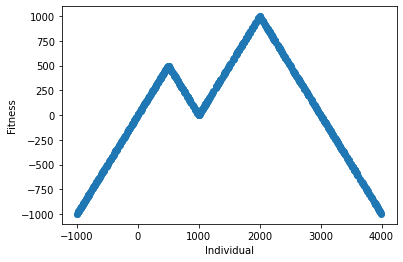

In [7]:
plt.plot(population, fitness, "o")
plt.xlabel("Individual")
plt.ylabel("Fitness")
plt.show()

## Evolver

The last presented component, Evolver uses the generator and evaluator to optimize the population in relation to the fitness function. 

In [8]:
from evolvepy import Evolver

# Here we specify for Evolver to use the previously created generator and evaluator, in generations of 100 individuals.
evolver = Evolver(generator, evaluator, 100)

We can finally optimize the population

In [9]:
# Optmizes over 200 generations
hist, last_population = evolver.evolve(200) 

Let's plot the results

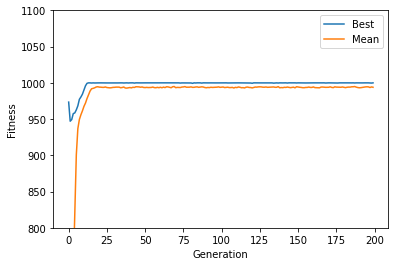

In [10]:
plt.plot(hist.max(axis=1))
plt.plot(hist.mean(axis=1))

plt.legend(["Best", "Mean"])
plt.xlabel("Generation")
plt.ylabel("Fitness")

plt.ylim(800,1100)

plt.show()

Observes how the algorithm fast find the best possible individual. In more complex problems, this process can take several generations, and we may not be sure that the algorithm has come to an end.

(OBS: due to the randomness of the algorithm, the example graph below and the one generated above may be different)

![](Example1-Figure1.jpg)

Another important thing to notice is the decline in best fitness in the early generations. That's because we don't define any form of elitism for our algorithm. Let's do that next.